In [1]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
X_train = X_train.reshape((60000, 28*28))  # (60000, 28, 28) -> (60000, 784)
X_test = X_test.reshape((10000, 28*28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [3]:
# 0 ~ 255 갭이 크니까. 연산속도를 줄이기 위해
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255

print(X_train[4])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [4]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Basic

In [5]:
from keras import models
from keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dense(10, activation='softmax'))

mnist.summary()

mnist.compile(loss='categorical_crossentropy',optimizer = 'rmsprop', metrics=['accuracy'])

Hist = mnist.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
375/375 [==============================] - 5s 6ms/step - loss: 0.4538 - accuracy: 0.8553 - val_loss: 0.1457 - val_accuracy: 0.9544
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0992 - accuracy: 0.9692 - val_loss: 0.1024 - val_accuracy: 0.9697
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0579 - accuracy: 

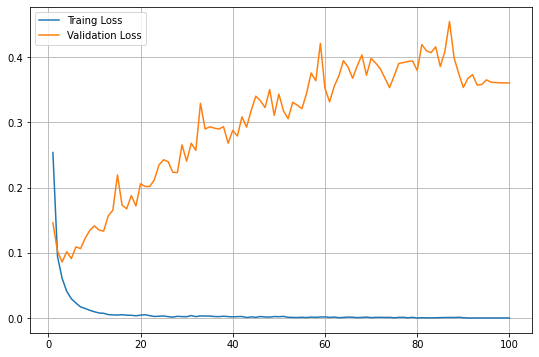

In [6]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.legend(['Traing Loss','Validation Loss'])
plt.grid()
plt.show()

In [35]:
basic_loss, basic_accuracy = mnist.evaluate(X_test, y_test)
print(basic_loss, basic_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3089 - accuracy: 0.9823
0.30891352891921997 0.9822999835014343



# node 축소

In [8]:
from keras import models
from keras import layers

Model = models.Sequential()
Model.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
Model.add(layers.Dense(10, activation='softmax'))

Model.summary()

Model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Hist = Model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 0.4675 - accuracy: 0.8651 - val_loss: 0.1511 - val_accuracy: 0.9565
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 0.1289 - accuracy: 0.9629 - val_loss: 0.1114 - val_accuracy: 0.9684
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0784 - accuracy: 0.9777 - val_loss: 0.0947 - val_accuracy: 0.9707
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0566

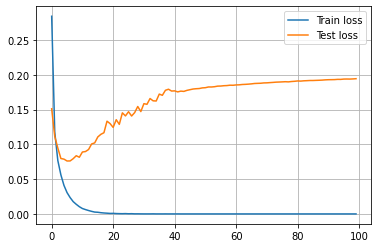

In [9]:
import matplotlib.pyplot as plt

plt.plot(Hist.history['loss'])
plt.plot(Hist.history['val_loss'])
plt.legend(['Train loss','Test loss'])
plt.grid()
plt.show()

In [34]:
small_loss, small_accuracy = Model.evaluate(X_test, y_test)
print(small_loss, small_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1652 - accuracy: 0.9826
0.16523170471191406 0.9825999736785889


# L2

In [11]:
from keras import models
from keras import layers
from keras import regularizers

Model_L2 = models.Sequential()
Model_L2.add(layers.Dense(512, activation='relu', input_shape=(28*28,), 
                       kernel_regularizer = regularizers.l2(0.00001)))
Model_L2.add(layers.Dense(256, activation='relu',
                       kernel_regularizer = regularizers.l2(0.00001)))
Model_L2.add(layers.Dense(10, activation='softmax'))
Model_L2.summary()

Model_L2.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Hist_L2 = Model_L2.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 0.4620 - accuracy: 0.8567 - val_loss: 0.1283 - val_accuracy: 0.9652
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1083 - accuracy: 0.9694 - val_loss: 0.1005 - val_accuracy: 0.9728
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0705 - accuracy

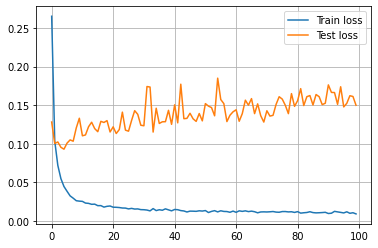

In [12]:
import matplotlib.pyplot as plt

plt.plot(Hist_L2.history['loss'])
plt.plot(Hist_L2.history['val_loss'])
plt.legend(['Train loss','Test loss'])
plt.grid()
plt.show()

In [37]:
L2_loss, L2_accuracy = Model_L2.evaluate(X_test, y_test)
print(L2_loss, L2_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1351 - accuracy: 0.9810
0.13514398038387299 0.9810000061988831


# Dropout

In [14]:
X_train = X_train.reshape((60000, 28*28))  # (60000, 28, 28) -> (60000, 784)
X_test = X_test.reshape((10000, 28*28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [15]:
from keras import models
from keras import layers

Model_DR = models.Sequential()
Model_DR.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
Model_DR.add(layers.Dropout(0.4))
Model_DR.add(layers.Dense(256, activation = 'relu'))
Model_DR.add(layers.Dropout(0.4))
Model_DR.add(layers.Dense(10, activation='softmax'))

Model_DR.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

Hist_DR = Model_DR.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Model_DR.summary()

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 0.5871 - accuracy: 0.8141 - val_loss: 0.1325 - val_accuracy: 0.9587
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1701 - accuracy: 0.9492 - val_loss: 0.1072 - val_accuracy: 0.9690
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1242 - accuracy: 0.9625 - val_loss: 0.0913 - val_accuracy: 0.9750
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1011 - accuracy: 0.9693 - val_loss: 0.0970 - val_accuracy: 0.9735
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0889 - accuracy: 0.9736 - val_loss: 0.0953 - val_accuracy: 0.9755
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0780 - accuracy: 0.9764 - val_loss: 0.0983 - val_accuracy: 0.9766
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0729 - accuracy: 0.9783 - val_loss: 0.0887 - val_accuracy: 0.9787

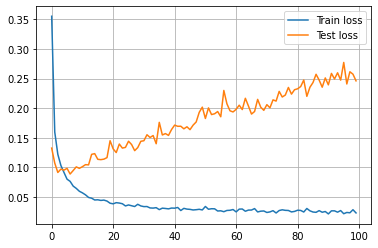

In [16]:
import matplotlib.pyplot as plt

plt.plot(Hist_DR.history['loss'])
plt.plot(Hist_DR.history['val_loss'])
plt.legend(['Train loss','Test loss'])
plt.grid()
plt.show()

In [36]:
DR_loss, DR_accuracy = Model_DR.evaluate(X_test, y_test)
print(DR_loss, DR_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.2150 - accuracy: 0.9838
0.21495041251182556 0.9837999939918518


# Batch_Normalization

In [18]:
Model_BN = models.Sequential()
Model_BN.add(layers.Dense(512, input_shape=(28*28,)))
Model_BN.add(layers.BatchNormalization())
Model_BN.add(layers.Activation('relu'))
Model_BN.add(layers.Dense(256))
Model_BN.add(layers.BatchNormalization())
Model_BN.add(layers.Activation('relu'))
Model_BN.add(layers.Dense(10, activation='softmax'))

Model_BN.summary()

Model_BN.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Hist_BN = Model_BN.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

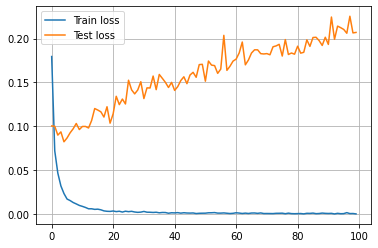

In [19]:
plt.plot(Hist_BN.history['loss'])
plt.plot(Hist_BN.history['val_loss'])
plt.legend(['Train loss','Test loss'])
plt.grid()
plt.show()

In [39]:
BN_loss, BN_accuracy = Model_BN.evaluate(X_test, y_test)
print(BN_loss, BN_accuracy)                                   

313/313 [==============================] - 1s 3ms/step - loss: 0.1723 - accuracy: 0.9830
0.17232435941696167 0.9829999804496765


# L2 + Dropout

In [21]:
L2_dropOut = models.Sequential()
L2_dropOut.add(layers.Dense(512, activation='relu', input_shape=(28*28,),
                            kernel_regularizer = regularizers.l2(0.00001)))
L2_dropOut.add(layers.Dropout(0.4))
L2_dropOut.add(layers.Dense(256, activation='relu', input_shape=(28*28,),
                            kernel_regularizer = regularizers.l2(0.00001)))
L2_dropOut.add(layers.Dropout(0.4))
L2_dropOut.add(layers.Dense(10, activation='softmax'))

L2_dropOut.summary()

L2_dropOut.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Hist_L2_dropOut = L2_dropOut.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 0.5888 - accuracy: 0.8159 - val_loss: 0

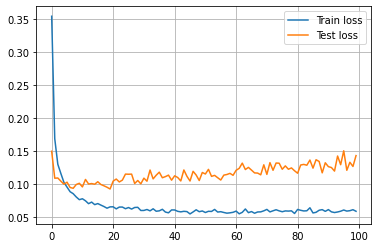

In [22]:
plt.plot(Hist_L2_dropOut.history['loss'])
plt.plot(Hist_L2_dropOut.history['val_loss'])
plt.legend(['Train loss','Test loss'])
plt.grid()
plt.show()

In [41]:
L2_DR_loss, L2_DR_accuracy = L2_dropOut.evaluate(X_test, y_test)
print(L2_DR_loss, L2_DR_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1382 - accuracy: 0.9814
0.13816304504871368 0.9814000129699707


# L2 + Batch Normal

In [24]:
L2_BN = models.Sequential()
L2_BN.add(layers.Dense(512, input_shape=(28*28,),
                       kernel_regularizer=regularizers.l2(0.00001)))
L2_BN.add(layers.BatchNormalization())
L2_BN.add(layers.Activation('relu'))
L2_BN.add(layers.Dense(256,
                       kernel_regularizer=regularizers.l2(0.00001)))
L2_BN.add(layers.BatchNormalization())
L2_BN.add(layers.Activation('relu'))
L2_BN.add(layers.Dense(10, activation='softmax'))

L2_BN.summary()

L2_BN.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Hist_L2_BN = L2_BN.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

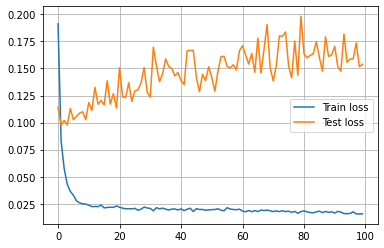

In [25]:
plt.plot(Hist_L2_BN.history['loss'])
plt.plot(Hist_L2_BN.history['val_loss'])
plt.legend(['Train loss','Test loss'])
plt.grid()
plt.show()

In [42]:
L2_BN_loss, L2_BN_accuracy = L2_BN.evaluate(X_test, y_test)
print(L2_BN_loss, L2_BN_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1324 - accuracy: 0.9820
0.13238978385925293 0.9819999933242798


# Dropout + Batch Normal

In [30]:
DR_BN = models.Sequential()

DR_BN.add(layers.Dense(512, input_shape=(28*28,)))
DR_BN.add(layers.BatchNormalization())
DR_BN.add(layers.Activation('relu'))
DR_BN.add(layers.Dropout(0.4))
DR_BN.add(layers.Dense(256))
DR_BN.add(layers.BatchNormalization())

DR_BN.add(layers.Activation('relu'))
DR_BN.add(layers.Dropout(0.4))
DR_BN.add(layers.Dense(10, activation='softmax'))

DR_BN.summary()

DR_BN.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Hist_DR_BN = DR_BN.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
activation_5 (Activation)    (None, 256)              

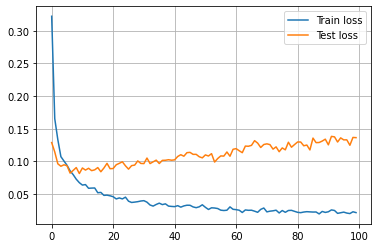

In [32]:
plt.plot(Hist_DR_BN.history['loss'])
plt.plot(Hist_DR_BN.history['val_loss'])
plt.legend(['Train loss','Test loss'])
plt.grid()
plt.show()

In [44]:
loss_DR_BN, accuracy_DR_BN = DR_BN.evaluate(X_test, y_test)
print(loss_DR_BN, accuracy_DR_BN)

313/313 [==============================] - 1s 3ms/step - loss: 0.1087 - accuracy: 0.9861
0.10874797403812408 0.9861000180244446


# 비교

In [45]:
print('Basic Loss = {:.5f}, Basic Accuracy = {:.5f}'.format(basic_loss, basic_accuracy))
print('Small Loss = {:.5f}, Small Accuracy = {:.5f}'.format(small_loss, small_accuracy))
print('L2 Loss = {:.5f}, L2 Accuracy = {:.5f}'.format(L2_loss, L2_accuracy))
print('Drop Loss = {:.5f}, Drop Accuracy = {:.5f}'.format(DR_loss, DR_accuracy))
print('BatchNormal Loss = {:.5f}, BatchNormal Accuracy = {:.5f}'.format(BN_loss, BN_accuracy))
print('L2 + Drop Loss = {:.5f}, L2 + Drop Accuracy = {:.5f}'.format(L2_DR_loss, L2_DR_accuracy))
print('L2 + Batch Normal Loss = {:.5f}, L2 + Batch Normal Accuracy = {:.5f}'.format(L2_BN_loss, L2_BN_accuracy ))
print('Dropout + Batch Normal Loss = {:.5f}, Dropout + Batch Normal Accuracy = {:.5f}'.format(loss_DR_BN, accuracy_DR_BN))

Basic Loss = 0.30891, Basic Accuracy = 0.98230
Small Loss = 0.16523, Small Accuracy = 0.98260
L2 Loss = 0.13514, L2 Accuracy = 0.98100
Drop Loss = 0.21495, Drop Accuracy = 0.98380
BatchNormal Loss = 0.17232, BatchNormal Accuracy = 0.98300
L2 + Drop Loss = 0.13816, L2 + Drop Accuracy = 0.98140
L2 + Batch Normal Loss = 0.13239, L2 + Batch Normal Accuracy = 0.98200
Dropout + Batch Normal Loss = 0.10875, Dropout + Batch Normal Accuracy = 0.98610
